In [17]:
import pandas as pd

In [18]:
# import dataset
df = pd.read_csv("/content/API_EN.GHG.CO2.PC.CE.AR5_DS2_en_csv_v2_127841.csv", skiprows=4)
# Source: World Bank (EN.GHG.CO2.PC.CE.AR5) - CO₂ emissions (metric tons per capita)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.459794,4.291167,4.277923,5.108834,4.168086,4.648097,4.684559,4.936708,NaN,NaN
1,Africa Eastern and Southern,AFE,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026116,1.012873,0.997157,0.983492,0.845417,0.863533,0.816361,0.784641,NaN,NaN
2,Afghanistan,AFG,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.216930,0.226011,0.215878,0.191491,0.180555,0.198268,0.203552,0.210043,NaN,NaN
3,Africa Western and Central,AFW,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.506323,0.495060,0.509713,0.518890,0.497159,0.512749,0.505462,0.482217,NaN,NaN
4,Angola,AGO,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,1.072053,0.924169,0.839019,0.851665,0.619139,0.731567,0.767587,0.768163,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            251 non-null    float64
 15  1971            251 non-null    float64
 16  1972            251 non-null    float64
 17  1973            251 non-null    flo

In [20]:
countries = [
    'Malaysia','Singapore','Thailand','Indonesia','Philippines','Vietnam',
    'Myanmar','Cambodia','Lao PDR','Brunei Darussalam','World'
]
asean_df = df[df['Country Name'].isin(countries)]


In [21]:
melted = asean_df.melt(
    id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],
    var_name='Year',
    value_name='CO2_per_capita'
)

# 去掉空值与非数字年份
melted = melted.dropna(subset=['CO2_per_capita'])
melted = melted[melted['Year'].str.isnumeric()]
melted['Year'] = melted['Year'].astype(int)
melted['CO2_per_capita'] = melted['CO2_per_capita'].astype(float)

# 检查结果
melted.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,CO2_per_capita
100,Brunei Darussalam,BRN,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1970,14.979502
101,Indonesia,IDN,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1970,0.268890
102,Cambodia,KHM,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1970,0.032112
103,Lao PDR,LAO,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1970,0.107990
104,Myanmar,MMR,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1970,0.173809


In [22]:
melted.to_csv("co2_clean_asean.csv", index=False)
print("Clean ASEAN dataset saved as co2_clean_asean.csv")


Clean ASEAN dataset saved as co2_clean_asean.csv


In [23]:
print("Year Range:", melted['Year'].min(), "-", melted['Year'].max())
print("Countries:", melted['Country Name'].unique())
print("Missing Values:", melted['CO2_per_capita'].isna().sum())


Year Range: 1970 - 2023
Countries: ['Brunei Darussalam' 'Indonesia' 'Cambodia' 'Lao PDR' 'Myanmar' 'Malaysia'
 'Philippines' 'Singapore' 'Thailand' 'World']
Missing Values: 0


In [24]:
# 检查缺失与重复
print("Missing values:", melted['CO2_per_capita'].isna().sum())
print("Duplicated rows:", melted.duplicated().sum())

# 检查范围
print("Year range:", melted['Year'].min(), "-", melted['Year'].max())
print("Countries:", melted['Country Name'].unique())

# 描述性统计（每个国家的平均/最大/最小值）
summary = melted.groupby('Country Name')['CO2_per_capita'].describe().round(2)
print(summary)


Missing values: 0
Duplicated rows: 0
Year range: 1970 - 2023
Countries: ['Brunei Darussalam' 'Indonesia' 'Cambodia' 'Lao PDR' 'Myanmar' 'Malaysia'
 'Philippines' 'Singapore' 'Thailand' 'World']
                   count   mean   std    min    25%    50%    75%    max
Country Name                                                            
Brunei Darussalam   54.0  18.78  2.05  13.57  17.55  18.64  19.96  23.63
Cambodia            54.0   0.26  0.30   0.03   0.06   0.15   0.35   1.03
Indonesia           54.0   1.24  0.65   0.26   0.63   1.28   1.77   2.40
Lao PDR             54.0   0.60  0.99   0.04   0.08   0.13   0.46   3.39
Malaysia            54.0   4.97  2.34   1.34   2.76   5.01   7.46   8.19
Myanmar             54.0   0.24  0.16   0.11   0.15   0.17   0.23   0.65
Philippines         54.0   0.87  0.21   0.53   0.71   0.84   0.95   1.40
Singapore           54.0   8.50  2.57   3.13   6.40   9.58  10.37  12.18
Thailand            54.0   2.35  1.31   0.49   0.84   2.77   3.57   3.98
Wor

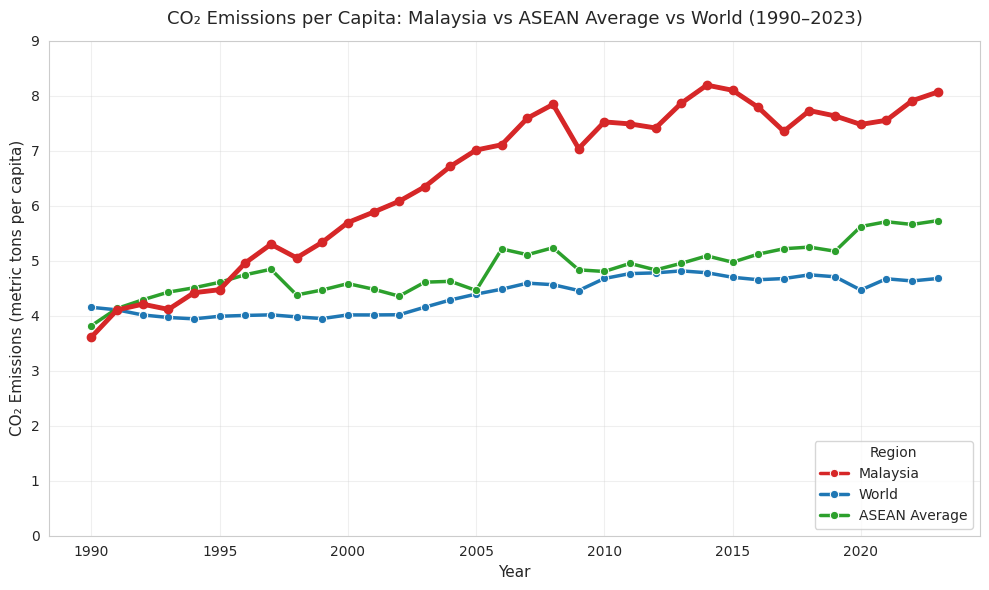

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

countries_to_plot = ['Malaysia', 'ASEAN Average', 'World']

# 如果你还没有生成 "ASEAN Average"，可以先计算：
asean_mean = (
    melted[melted['Country Name'] != 'World']
    .groupby('Year')['CO2_per_capita']
    .mean()
    .reset_index()
)
asean_mean['Country Name'] = 'ASEAN Average'

# 把 ASEAN 平均值加回原始数据
combined = pd.concat([melted, asean_mean])

# 选出要画的国家子集
subset = combined[combined['Country Name'].isin(countries_to_plot)]

sns.set_style("whitegrid")

# 限制年份 1990–2023
subset = subset[(subset['Year'] >= 1990) & (subset['Year'] <= 2023)]

# 自定义颜色 + Malaysia 加粗
palette = {
    'Malaysia': '#d62728',       # 红色突出
    'ASEAN Average': '#2ca02c',  # 绿色
    'World': '#1f77b4'           # 蓝色
}

plt.figure(figsize=(10,6))
sns.lineplot(
    data=subset,
    x='Year', y='CO2_per_capita',
    hue='Country Name',
    palette=palette,
    marker='o',
    linewidth=2.5
)

# 特别加粗 Malaysia 线条
plt.plot(
    subset[subset['Country Name']=='Malaysia']['Year'],
    subset[subset['Country Name']=='Malaysia']['CO2_per_capita'],
    color='#d62728', linewidth=3.5, marker='o'
)

# 标题 + 标签 + 图例位置
plt.title("CO₂ Emissions per Capita: Malaysia vs ASEAN Average vs World (1990–2023)", fontsize=13, pad=12)
plt.xlabel("Year", fontsize=11)
plt.ylabel("CO₂ Emissions (metric tons per capita)", fontsize=11)
plt.legend(title='Region', loc='lower right', frameon=True)
plt.grid(alpha=0.3)
plt.ylim(0, 9)  # 从 0 开始，避免夸大差距
plt.tight_layout()
plt.show()


/tmp/ipython-input-2718462487.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


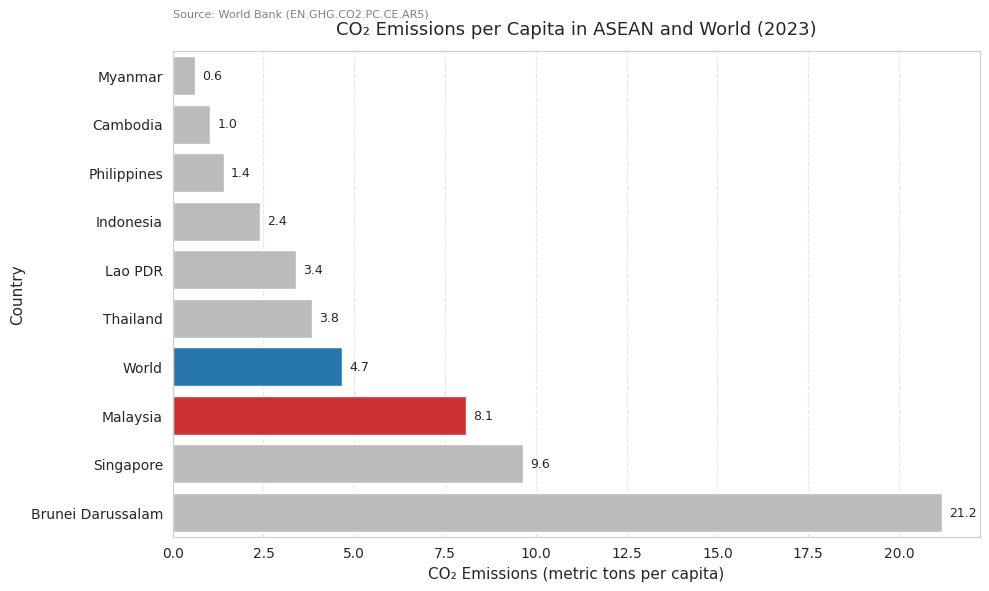

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择确定年份并排序
latest_year = 2023
latest = melted[melted['Year'] == latest_year].copy()
latest = latest.sort_values(by='CO2_per_capita', ascending=True)

# 2设置颜色：浅灰+重点色
colors = ['#bbbbbb' if c not in ['Malaysia','World'] else
          '#d62728' if c=='Malaysia' else '#1f77b4'
          for c in latest['Country Name']]

# 绘图
plt.figure(figsize=(10,6))
sns.barplot(
    data=latest, x='CO2_per_capita', y='Country Name',
    palette=colors, saturation=0.9
)

# 标题与标注
plt.title(f"CO₂ Emissions per Capita in ASEAN and World ({latest_year})", fontsize=13, pad=12)
plt.xlabel("CO₂ Emissions (metric tons per capita)", fontsize=11)
plt.ylabel("Country", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 加数值标签
for i, (v, name) in enumerate(zip(latest['CO2_per_capita'], latest['Country Name'])):
    plt.text(v + 0.2, i, f"{v:.1f}", va='center', fontsize=9)

# 数据来源说明
plt.text(0, -1.2, "Source: World Bank (EN.GHG.CO2.PC.CE.AR5)", fontsize=8, color='gray')

plt.tight_layout()
plt.show()



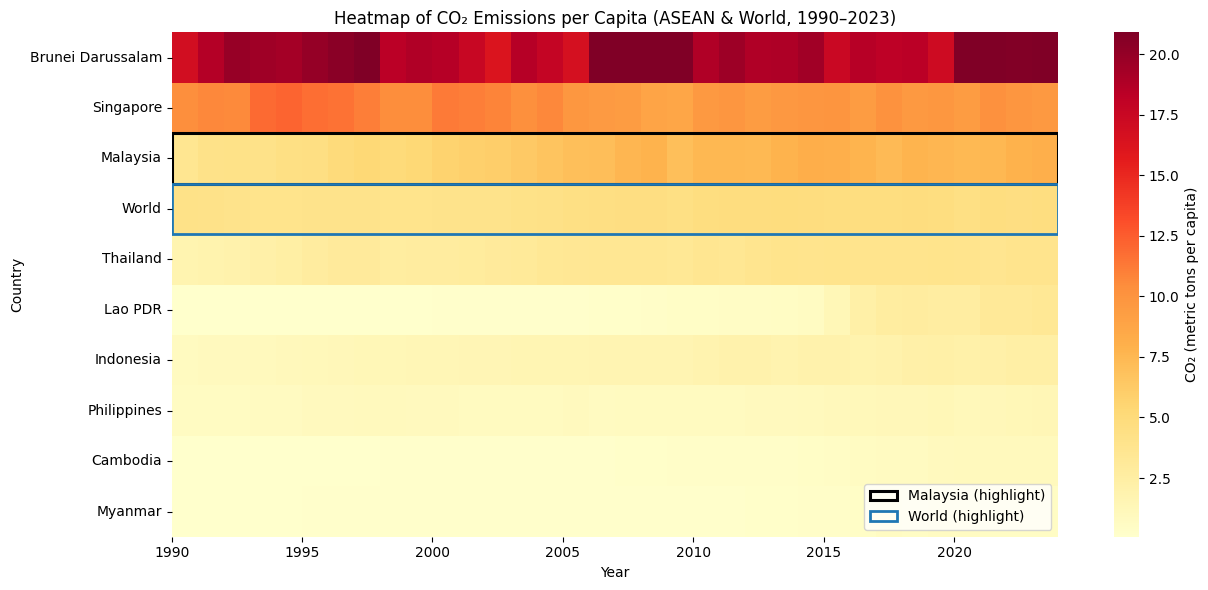

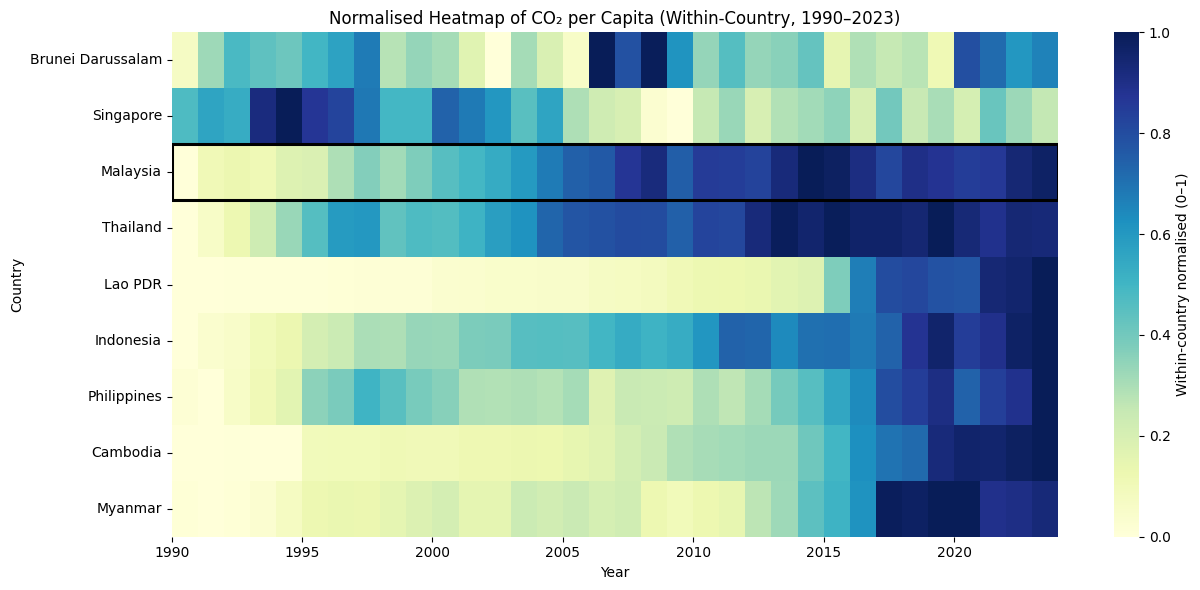

In [32]:
# ==== prerequisites ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# 1) 保障数据类型正确
melted = melted.copy()
melted['Year'] = melted['Year'].astype(int)
melted['CO2_per_capita'] = pd.to_numeric(melted['CO2_per_capita'], errors='coerce')

# 2) 仅保留研究时间窗（与标题一致）
year_min, year_max = 1990, 2023
melted_win = melted[(melted['Year'] >= year_min) & (melted['Year'] <= year_max)].dropna(subset=['CO2_per_capita'])

# 3) 透视为国家 × 年份矩阵
heat = melted_win.pivot_table(
    values='CO2_per_capita',
    index='Country Name',
    columns='Year',
    aggfunc='mean'  # 如有重复，取平均
)

# 4) 根据“最新可用年份”排序（优先 2023，不在则用该国最后一年）
target_year = year_max if year_max in heat.columns else int(heat.columns.max())
order = heat.sort_values(by=target_year, ascending=False).index
heat = heat.loc[order]

# 5)——— 绝对值热力图（裁剪极端值 + 高亮） ———
vmin = np.nanpercentile(heat.values, 2)
vmax = np.nanpercentile(heat.values, 98)

plt.figure(figsize=(13, 6))
ax = sns.heatmap(
    heat, cmap='YlOrRd', vmin=vmin, vmax=vmax, linewidths=0,
    cbar_kws={'label': 'CO₂ (metric tons per capita)'}
)
ax.set_title(f"Heatmap of CO₂ Emissions per Capita (ASEAN & World, {year_min}–{year_max})")
ax.set_xlabel("Year"); ax.set_ylabel("Country")

# 年份刻度每 5 年一个（你原来这段就可保留）
years = list(heat.columns)
tick_years = list(range(year_min, year_max+1, 5))
tick_pos = [years.index(y) for y in tick_years if y in years]
ax.set_xticks(tick_pos); ax.set_xticklabels(tick_years, rotation=0)

# 高亮 Malaysia 与 World 外框（建立视觉层级）
for target, color, lw in [('Malaysia', 'black', 2.2), ('World', '#1f77b4', 2.0)]:
    if target in heat.index:
        i = list(heat.index).index(target)
        ax.add_patch(plt.Rectangle(
            (0, i), len(heat.columns), 1, fill=False, lw=lw, edgecolor=color
        ))

# —— 在这里加入“自定义图例（说明描边）” —— #
legend_handles = [
    mpatches.Patch(edgecolor='black', facecolor='none', label='Malaysia (highlight)', linewidth=2.2),
    mpatches.Patch(edgecolor='#1f77b4', facecolor='none', label='World (highlight)', linewidth=2.0)
]
ax.legend(handles=legend_handles, loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

# 6)——— 行内标准化热力图（0–1） ———
# 突出“各国内部的相对变化”而非绝对值大小
row_min = heat.min(axis=1)
row_max = heat.max(axis=1)
den = (row_max - row_min).replace(0, np.nan)  # 避免除零
row_norm = (heat.sub(row_min, axis=0)).div(den, axis=0).fillna(0)

# —— 在这里插入“去掉 World + 按增幅排序” —— #
# 去掉 World（避免平均值语义与国家混用）
row_norm_no_world = row_norm.drop(index=['World'], errors='ignore')

# 按绝对值矩阵的增幅（最后一年-第一年）从高到低排序
delta_order = (heat.iloc[:, -1] - heat.iloc[:, 0]).sort_values(ascending=False).index
row_norm_sorted = row_norm_no_world.loc[row_norm_no_world.index.intersection(delta_order)]

plt.figure(figsize=(13, 6))
ax2 = sns.heatmap(
    row_norm_sorted, cmap='YlGnBu', linewidths=0,
    cbar_kws={'label': 'Within-country normalised (0–1)'}
)
ax2.set_title(f"Normalised Heatmap of CO₂ per Capita (Within-Country, {year_min}–{year_max})")
ax2.set_xlabel("Year"); ax2.set_ylabel("Country")

# 同样的年份刻度
ax2.set_xticks(tick_pos); ax2.set_xticklabels(tick_years, rotation=0)

# 继续高亮 Malaysia（World 已去掉）
if 'Malaysia' in row_norm_sorted.index:
    i = list(row_norm_sorted.index).index('Malaysia')
    ax2.add_patch(plt.Rectangle(
        (0, i), len(row_norm_sorted.columns), 1, fill=False, lw=2.2, edgecolor='black'
    ))

plt.tight_layout()
plt.show()




In [56]:
import pandas as pd

# === Step 1. 载入原始数据 ===
df = pd.read_csv("API_EN.GHG.CO2.PC.CE.AR5_DS2_en_csv_v2_127841.csv", skiprows=4)

# === Step 2. 筛选 ASEAN + World 国家 ===
asean_countries = [
    "Malaysia", "Singapore", "Thailand", "Indonesia", "Vietnam",
    "Philippines", "Cambodia", "Lao PDR", "Myanmar", "Brunei Darussalam", "World"
]
df = df[df["Country Name"].isin(asean_countries)]

# === Step 3. 转成长格式 ===
melted = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="CO2_per_capita"
)

# === Step 4. 清理数据 ===
melted = melted[melted["Year"].str.isnumeric()]          # 去掉非年份行
melted["Year"] = melted["Year"].astype(int)
melted["CO2_per_capita"] = pd.to_numeric(melted["CO2_per_capita"], errors="coerce")
melted = melted.dropna(subset=["CO2_per_capita"])        # 删除缺失值

# === Step 5. 仅保留 1990–2023 年 ===
melted = melted[(melted["Year"] >= 1990) & (melted["Year"] <= 2023)]

# === Step 6. 保存干净版数据 ===
melted.to_csv("co2_clean_asean.csv", index=False)
print("✅ 成功导出：co2_clean_asean.csv")
print("行数:", len(melted), "| 国家数:", melted['Country Name'].nunique())

# === 可选：快速预览 ===
melted.head()


✅ 成功导出：co2_clean_asean.csv
行数: 340 | 国家数: 10


,Country Name,Country Code,Indicator Name,Indicator Code,Year,CO2_per_capita
300,Brunei Darussalam,BRN,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1990,16.843458
301,Indonesia,IDN,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1990,0.881620
302,Cambodia,KHM,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1990,0.058619
303,Lao PDR,LAO,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1990,0.059741
304,Myanmar,MMR,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1990,0.111319
